In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

data = pd.read_csv("/home/pintz/dev/analytics/gdp-by-state/data/processed/data.csv")
data

,STATE,SECTOR,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,"Agriculture, forestry, fishing and hunting",2.176800e+09,2.411300e+09,2.730500e+09,2.685600e+09,2.933300e+09,2.528700e+09,3.127700e+09,3.638300e+09,...,1.788800e+09,2.986400e+09,2.590700e+09,3.185300e+09,2.781600e+09,3.050100e+09,3.185100e+09,2.666700e+09,2.190300e+09,2.871000e+09
1,Alabama,"Mining, quarrying, and oil and gas extraction",3.492800e+09,3.959800e+09,3.606800e+09,3.248800e+09,3.581500e+09,3.294900e+09,3.422400e+09,3.520500e+09,...,2.906400e+09,2.774400e+09,2.408800e+09,2.309200e+09,2.229900e+09,2.920600e+09,2.739700e+09,2.500600e+09,2.373500e+09,2.196800e+09
2,Alabama,Utilities,4.150900e+09,4.024400e+09,4.709200e+09,4.834600e+09,4.232500e+09,4.309300e+09,4.299100e+09,4.551000e+09,...,5.711800e+09,5.524600e+09,5.254600e+09,5.337800e+09,5.771500e+09,5.555300e+09,5.439700e+09,5.581600e+09,5.668400e+09,5.321000e+09
3,Alabama,Construction,9.379400e+09,1.004760e+10,1.022370e+10,1.024180e+10,9.775800e+09,9.336200e+09,9.279200e+09,9.136000e+09,...,6.897600e+09,6.649300e+09,6.363200e+09,6.335000e+09,6.643800e+09,6.827800e+09,7.078700e+09,7.506000e+09,7.520500e+09,7.730300e+09
4,Alabama,Manufacturing,2.182400e+10,2.248370e+10,2.354690e+10,2.406180e+10,2.352440e+10,2.376890e+10,2.470240e+10,2.994730e+10,...,3.205870e+10,3.381410e+10,3.276980e+10,3.220950e+10,3.346970e+10,3.428260e+10,3.530480e+10,3.541420e+10,3.395390e+10,3.606240e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Wyoming,Health care and social assistance,8.421000e+08,8.562000e+08,9.087000e+08,9.682000e+08,9.895000e+08,1.050000e+09,1.105900e+09,1.164700e+09,...,1.561600e+09,1.554900e+09,1.553700e+09,1.579900e+09,1.573400e+09,1.566400e+09,1.594400e+09,1.611800e+09,1.619000e+09,1.616200e+09
1016,Wyoming,"Arts, entertainment, and recreation",1.928000e+08,1.902000e+08,2.115000e+08,2.346000e+08,1.962000e+08,1.681000e+08,1.752000e+08,1.766000e+08,...,2.613000e+08,2.481000e+08,2.725000e+08,2.469000e+08,2.385000e+08,2.506000e+08,2.574000e+08,2.454000e+08,2.073000e+08,2.451000e+08
1017,Wyoming,Accommodation and food services,7.158000e+08,7.160000e+08,7.769000e+08,8.246000e+08,7.731000e+08,8.734000e+08,9.105000e+08,9.892000e+08,...,1.140700e+09,1.147500e+09,1.142600e+09,1.208700e+09,1.149500e+09,1.165400e+09,1.088400e+09,1.116400e+09,1.019000e+09,1.228100e+09
1018,Wyoming,Other services (except government and governme...,6.585000e+08,6.747000e+08,6.903000e+08,7.182000e+08,6.000000e+08,6.413000e+08,5.950000e+08,5.756000e+08,...,6.439000e+08,6.119000e+08,5.770000e+08,5.620000e+08,5.141000e+08,5.072000e+08,5.281000e+08,5.325000e+08,5.003000e+08,5.106000e+08


In [3]:
# Clustering Analysis of States with similar sector growth patterns over time
# Convert "1997" and "2021" columns to numeric values
data["1997"] = pd.to_numeric(data["1997"])
data["2021"] = pd.to_numeric(data["2021"])

# Calculate the overall GDP growth for each state
state_gdp = data.groupby("STATE").sum()
state_gdp_growth = ((state_gdp["2021"] - state_gdp["1997"]) / state_gdp["1997"]) * 100

# Find the top 5 and bottom 5 states by GDP growth
top_5_states = state_gdp_growth.nlargest(5)
bottom_5_states = state_gdp_growth.nsmallest(5)

# Loop through the states and print out the top 3 sectors with the highest growth rate
for state in state_gdp_growth.index:
    label = ""
    if state in top_5_states.index:
        label = "(Top 5)"
    elif state in bottom_5_states.index:
        label = "(Bottom 5)"
    if label:
        print(f"\nTop 3 growing sectors in {state} {label}:")
        state_data = data[data["STATE"] == state]
        sector_gdp = state_data.groupby("SECTOR").sum()
        sector_growth = ((sector_gdp["2021"] - sector_gdp["1997"]) / sector_gdp["1997"]) * 100
        top_3_sectors = sector_growth.nlargest(3)
        print(top_3_sectors)


Top 3 growing sectors in Alaska (Bottom 5):
SECTOR
Health care and social assistance                   180.461970
Information                                         178.850304
Professional, scientific, and technical services     53.214002
dtype: float64

Top 3 growing sectors in Arizona (Top 5):
SECTOR
Information             409.878402
Manufacturing           238.113407
Educational services    205.597554
dtype: float64

Top 3 growing sectors in California (Top 5):
SECTOR
Information                                         604.868744
Manufacturing                                       235.891659
Professional, scientific, and technical services    193.681484
dtype: float64

Top 3 growing sectors in Louisiana (Bottom 5):
SECTOR
Information                                                                 173.626757
Administrative and support and waste management and remediation services    108.862283
Finance and insurance                                                        84.163208
d

/tmp/ipykernel_9489/1690303736.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_gdp = data.groupby("STATE").sum()
/tmp/ipykernel_9489/1690303736.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_gdp = state_data.groupby("SECTOR").sum()
/tmp/ipykernel_9489/1690303736.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_gdp = state_data.groupby("SECTOR").sum()
/tmp/ipykernel_9489/1690303736.py:24:

In [10]:
new_data = pd.read_csv("/home/pintz/dev/analytics/gdp-by-state/data/processed/new_data.csv")
new_data

,STATE,Accommodation and food services,Administrative and support and waste management and remediation services,"Agriculture, forestry, fishing and hunting","Arts, entertainment, and recreation",Construction,Educational services,Finance and insurance,Government and government enterprises,Health care and social assistance,...,Manufacturing,"Mining, quarrying, and oil and gas extraction",Other services (except government and government enterprises),"Professional, scientific, and technical services",Real estate and rental and leasing,Retail trade,Transportation and warehousing,Utilities,Wholesale trade,TOTAL_GDP_GROWTH
0,Alabama,50.927554,125.520716,31.890849,7.781075,-17.582148,21.925071,50.102698,14.219576,69.274653,...,65.241935,-37.104902,-9.077089,119.112189,72.093562,40.572373,26.216855,28.189067,45.407066,43.645937
1,Alaska,20.629578,36.924045,-25.481575,26.130389,-21.160440,2.032235,-2.944618,11.269019,180.461970,...,-14.686644,-40.382062,-23.515215,53.214002,52.694290,28.939763,49.112567,35.079217,43.650258,4.595814
2,Arizona,60.903845,169.592774,40.185879,23.681597,10.750476,205.597554,138.518053,28.352709,172.598767,...,238.113407,53.344259,2.791874,148.242443,119.807069,101.434973,64.918545,42.806917,83.169936,100.878876
3,Arkansas,60.004797,177.604710,-0.449032,60.821759,-27.747436,62.758621,95.428053,19.177598,79.505294,...,12.656096,58.933740,-9.074560,114.483089,74.364582,73.232430,12.238725,26.932084,104.383756,46.458316
4,California,59.032766,120.204574,69.260594,51.819234,20.621280,83.247965,130.992829,30.785136,136.353838,...,235.891659,-12.808835,-21.211899,193.681484,54.478681,54.325965,57.599176,50.449325,87.944507,103.224966
5,Colorado,73.205014,96.167210,47.363231,61.086091,22.249727,110.818236,111.699014,31.768707,122.160926,...,145.581288,228.279042,10.496889,220.245085,87.108656,85.953755,55.849856,51.227955,102.192897,98.715246
6,Connecticut,18.829719,62.199972,-18.032359,-0.059817,-35.929733,41.092944,44.310118,1.008434,47.364222,...,16.904845,8.289242,-30.352913,48.422918,26.931186,20.215805,33.262384,-0.134468,33.310832,28.633653
7,Delaware,19.283032,120.819232,126.196078,-2.235835,-17.660800,10.098684,57.737029,25.406030,115.083682,...,9.734494,-81.627907,-9.364252,53.851621,49.070769,37.592471,67.471591,18.883686,32.923766,40.018873
8,District of Columbia,15.486864,120.762943,537.500000,69.260992,42.797311,14.076777,98.203694,26.784030,77.797571,...,-10.296462,-100.000000,40.312700,87.030564,89.974917,51.371742,-34.961805,61.397240,82.529475,59.101866
9,Florida,66.766681,106.949682,-11.306111,25.330244,18.403294,89.249476,125.791580,15.256263,107.069472,...,101.059939,-27.334887,-4.331621,168.448865,122.285718,87.005022,38.591376,31.838968,106.846869,82.677534


In [11]:
data = new_data

# Define the predictor variables (20 sectors) and the response variable (total GDP growth)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Fit a linear regression model using statsmodels
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TOTAL_GDP_GROWTH   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     36.80
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           7.32e-16
Time:                        21:48:49   Log-Likelihood:                -161.70
No. Observations:                  51   AIC:                             365.4
Df Residuals:                      30   BIC:                             406.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

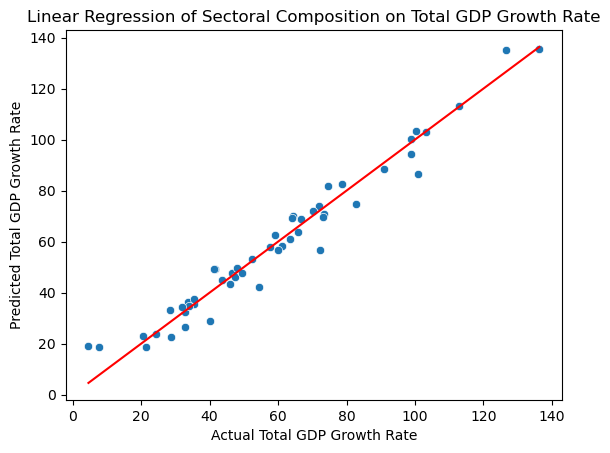

In [15]:
# Create a scatter plot of the actual vs. predicted values
sns.scatterplot(x=y, y=model.predict(sm.add_constant(X)))

# Add a regression line to the plot
sns.lineplot(x=y, y=y, color="red")

# Add labels and a title to the plot
plt.xlabel("Actual Total GDP Growth Rate")
plt.ylabel("Predicted Total GDP Growth Rate")
plt.title("Linear Regression of Sectoral Composition on Total GDP Growth Rate")

# Show the plot
plt.show()